In [25]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
os.chdir("C:/Users/saisaran/Desktop/DATA_SETS")

In [5]:
data=pd.read_csv("challenger.csv")

In [6]:
data

,o_ring_ct,O.ring.failures,temperature,pressure,launch_id
0,6,0,66,50,1
1,6,1,70,50,2
2,6,0,69,50,3
3,6,0,68,50,4
4,6,0,67,50,5
5,6,0,72,50,6
6,6,0,73,100,7
7,6,0,70,100,8
8,6,1,57,200,9
9,6,1,63,200,10


In [11]:
targetor=data['O.ring.failures']

In [12]:
predictor=data['temperature']

In [15]:
import statsmodels.api as sm

In [21]:
model=sm.OLS(predictor,targetor).fit()

In [22]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            temperature   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     4.755
Date:                Mon, 03 Jun 2019   Prob (F-statistic):             0.0402
Time:                        18:27:29   Log-Likelihood:                -128.07
No. Observations:                  23   AIC:                             258.1
Df Residuals:                      22   BIC:                             259.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
O.ring.failures    47.1111     21.605      2.181      0.040       2.304      91.918
==============================================================================
Omnibus:                       13.767   Durbin-Watson:                   0.420
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               12.461
Skew:                          -1.591   Prob(JB):                      0.00197
Kurtosis:                       4.697   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

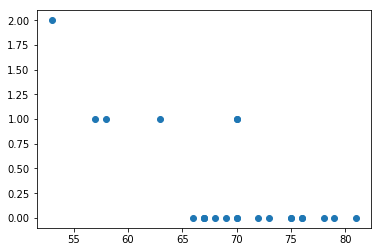

In [29]:
plt.plot(predictor,targetor,'o')

In [30]:
import seaborn as sns

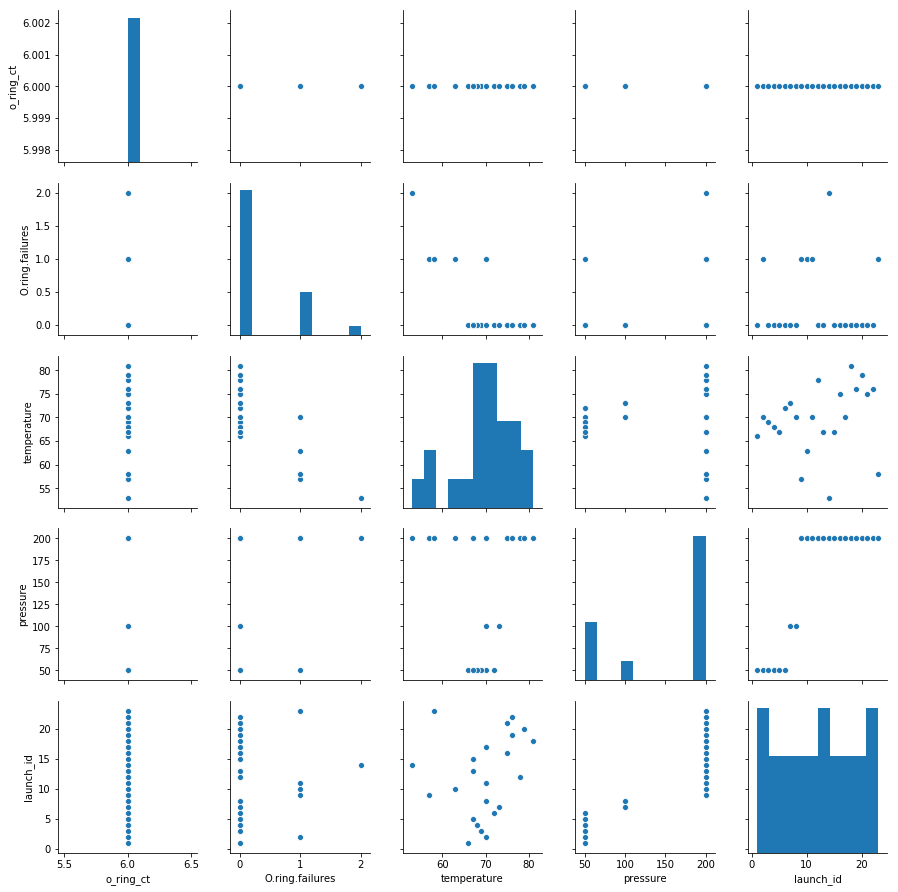

In [31]:
sns.pairplot(data)

In [32]:
corr=data.corr()

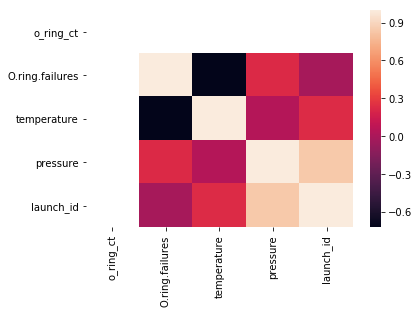

In [33]:
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)

In [36]:
data['temperature']

0     66
1     70
2     69
3     68
4     67
5     72
6     73
7     70
8     57
9     63
10    70
11    78
12    67
13    53
14    67
15    75
16    70
17    81
18    76
19    79
20    75
21    76
22    58
Name: temperature, dtype: int64

In [38]:
X=data['temperature']

In [41]:
X=X.values.reshape(-1,1)

In [42]:
X

array([[66],
       [70],
       [69],
       [68],
       [67],
       [72],
       [73],
       [70],
       [57],
       [63],
       [70],
       [78],
       [67],
       [53],
       [67],
       [75],
       [70],
       [81],
       [76],
       [79],
       [75],
       [76],
       [58]], dtype=int64)

In [44]:
X.shape

(23, 1)

In [55]:
X=X.reshape(-1,1)

In [56]:
X.shape

(23, 1)

In [50]:
y=targetor

In [51]:
y.shape

(23,)

In [53]:
from sklearn.model_selection import train_test_split

In [57]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=1)

In [59]:
X_train.shape

(13, 1)

In [61]:
X_test.shape

(10, 1)

In [83]:
from sklearn import linear_model as lm


In [84]:
model=lm.LinearRegression()

In [85]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [86]:
accuracy=model.score(X_train,y_train)

In [87]:
accuracy

0.49669252207783493

In [90]:
model.predict(X_test)

array([-0.02417649, -0.33605319,  0.33967966,  1.11937141, -0.23209429,
        0.23572076,  0.23572076,  0.39165911,  0.28770021, -0.07615594])

In [91]:
model.score(X_test,y_test)

0.5268468243091089